# Data Exploration: *Alphabetical Guide to Spain*
List accompanied Thomas Matthews' Spain tasting report in *Wine Spectator* (October 15, 2020)
[Link](https://www.winespectator.com/articles/alphabetical-guide-to-spain-101520) to *Alphabetical Guide to Spain*

## File Setup

In [42]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
import geopandas as gpd
from scipy import stats

In [43]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe exploration
Import dataframes containing wine data and geographic data on Spanish wine regions.

In [44]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

# w = wine, g = geo
# Note: save CSV files in UTF-8 format to preserve special Spanish-language characters

df_w = pd.read_csv('./Alphabetical Guide to Spain - List Upload.csv')
df_g = pd.read_csv('./Alphabetical Guide to Spain - Geo.csv')

In [45]:
df_w.shape

(598, 59)

In [46]:
df_g.shape

(40, 5)

In [47]:
df_w.sample(10)

,Winery,Wine,Score,Price,Wine_Style,Denominación_de_Origen_DO,Geographical_Indication,Year,Rioja_Style,cat_Airén,...,cat_Tempranillo,cat_Tintilla_de_Rota,cat_Tinto_Velasco,cat_Treixadura,cat_Verdejo,cat_Vermell,cat_Vijiriega,cat_Viognier,cat_Viura|Macabeo,cat_Xarel-lo
85,BODEGAS CAMPO VIEJO,Garnacha Rioja 2018,89,13.0,Red,Rioja,Multi-Regional,2018,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,BODEGAS BLEDA,Jumilla Divus 2013,87,33.0,Red,Jumilla,Multi-Regional,2013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,BODEGAS GORMAZ,Ribera del Duero 12 Linajes Grano a Grano 2017,90,85.0,Red,Ribera del Duero,Castilla y León,2017,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,BODEGAS EGO,Jumilla Fuerza 2017,90,22.0,Red,Jumilla,Multi-Regional,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,VOLVER,Tempranillo Viño de la Tierra de Castilla Paso...,85,9.0,Red,Viño de la Tierra,Castilla,2018,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,HAMMEKEN CELLARS,Monastrell Jumilla Creencia con Virtud 2015,88,49.0,Red,Jumilla,Multi-Regional,2015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,BODEGAS Y VIÑEDOS TÁBULA,Ribera del Duero Damana 5 2018,85,16.0,Red,Ribera del Duero,Castilla y León,2018,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,BODEGAS SIERRA CANTABRIA,Rioja Crianza 2016,88,20.0,Red,Rioja,Multi-Regional,2016,Crianza,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,COMPAÑÍA BODEGUERA DE VALENCISO,Rioja 10 Años Después 2008,87,80.0,Red,Rioja,Multi-Regional,2008,Rioja,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,BODEGAS OLLAURI,Rioja Conde de Los Andes Colección Histórica 2004,91,90.0,Red,Rioja,Multi-Regional,2004,Rioja,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_g.sample(10)

,Denominación_de_Origen_DO,Denominacion_or_GeoIndicator,Latitude,Longitude,Unnamed: 4
34,Mallorca,Geographical_Indication,39.616667,2.983333,https://geohack.toolforge.org/geohack.php?page...
18,Navarra,Denominación_de_Origen_DO,42.481111,1.650556,https://geohack.toolforge.org/geohack.php?page...
28,Terra Alta,Denominación_de_Origen_DO,41.050000,0.433333,https://geohack.toolforge.org/geohack.php?page...
5,Campo de Borja,Denominación_de_Origen_DO,41.816667,-1.533333,https://geohack.toolforge.org/geohack.php?page...
4,Calatayud,Denominación_de_Origen_DO,41.650000,-0.883333,https://geohack.toolforge.org/geohack.php?page...
26,Rueda,Denominación_de_Origen_DO,41.414130,-4.957104,https://geohack.toolforge.org/geohack.php?page...
2,Bierzo,Denominación_de_Origen_DO,42.550000,-6.583333,https://geohack.toolforge.org/geohack.php?page...
39,Extremadura,Geographical_Indication,39.000000,-6.000000,https://geohack.toolforge.org/geohack.php?page...
1,Alicante,Denominación_de_Origen_DO,38.736944,-0.274656,https://geohack.toolforge.org/geohack.php?page...
12,Jumilla,Denominación_de_Origen_DO,38.783333,-1.316667,https://geohack.toolforge.org/geohack.php?page...


In [49]:
df_w_notnull = df_w[
    (df_w.Score > 0) & 
    (df_w.Price > 0) 
]

df_w_notnull.shape

(593, 59)

## Eliminate Outliers
Repeat the analysis above, but exclude two wines with extreme prices:
* Ribera del Duero Unico 2010, Score = 96, Price = 540
* Ribera del Duero Unico Reserva Especial NV, Score = 95, Price = 700

In [50]:
df_w_trim = df_w[
    (df_w.Score > 0) & 
    (df_w.Price > 0) &
    (df_w.Price < 540)
]

df_w_trim.shape

(591, 59)

## Differentiate Table Wine from Mainstream Quality Wine
I include wine labeled Viño de la Tierra, Vi de la Terra (Mallorca), and Vino de España in this definition.

In [51]:
# Identify those columns that start with 'cat_' identifier. 
# Create a new column that concatenates those columns where value is not 'None'.

# Split table wine into temp df
df_w_trim_table = df_w_trim[
    (df_w_trim['Denominación_de_Origen_DO'] == 'Viño de la Tierra ') | 
    (df_w_trim['Denominación_de_Origen_DO'] == 'Vi de la Terra') |
    (df_w_trim['Denominación_de_Origen_DO'] == 'Vino de España')
]

df_w_trim_table['Wine_Quality'] = 'Table Wine'
     
# Split mainstream wine into temp df 
     
df_w_trim_main = df_w_trim[
    (df_w_trim['Denominación_de_Origen_DO'] != 'Viño de la Tierra ') | 
    (df_w_trim['Denominación_de_Origen_DO'] != 'Vi de la Terra') |
    (df_w_trim['Denominación_de_Origen_DO'] != 'Vino de España')
]

df_w_trim_main['Wine_Quality'] = 'Mainstream Wine'
     
df_w_trim = pd.concat([df_w_trim_table, df_w_trim_main])     

df_w_trim.sample(10)

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Winery,Wine,Score,Price,Wine_Style,Denominación_de_Origen_DO,Geographical_Indication,Year,Rioja_Style,cat_Airén,...,cat_Tintilla_de_Rota,cat_Tinto_Velasco,cat_Treixadura,cat_Verdejo,cat_Vermell,cat_Vijiriega,cat_Viognier,cat_Viura|Macabeo,cat_Xarel-lo,Wine_Quality
329,BODEGAS MONTECILLO,Rioja White 2018,88,11.0,White,Rioja,Multi-Regional,2018,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Viura|Macabeo,NaN,Mainstream Wine
496,BODEGAS SIERRA CANTABRIA,Rioja Gran Reserva 2009,91,40.0,Red,Rioja,Multi-Regional,2009,Gran Reserva,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine
442,BODEGAS PRÍNCIPE DE VIANA,Navarra Edición Blanca 2018,87,25.0,White,Navarra,Navarra,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine
396,BODEGAS Y VIÑEDOS ORTEGA EZQUERRO,Rioja Vino de Tudelilla 2018,84,13.0,Red,Rioja,Multi-Regional,2018,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine
583,BODEGAS VIRGEN DE LOREA,Bizkaiko Txakolina Señorio de Otxaran 2018,90,25.0,White,Bizkaiko Txakolina,Basque Country,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine
389,BODEGAS ORDOÑEZ,Tinta de Toro Toro Vatan 2016,93,45.0,Red,Toro,Castilla y León,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine
346,BODEGAS MUGA,Rioja Selección Especial 2015,93,45.0,Red,Rioja,Multi-Regional,2015,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine
494,BODEGAS SIERRA CANTABRIA,Rioja Crianza 2016,88,20.0,Red,Rioja,Multi-Regional,2016,Crianza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine
230,ANTONIO HIDALGO SELECTION,Rioja Tradición H 2016,86,36.0,White,Rioja,Multi-Regional,2016,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Viura|Macabeo,NaN,Mainstream Wine
423,PERINET,Carignan Priorat Pendents 2016,92,130.0,Red,Priorat,Catalonia,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mainstream Wine


## Statistics by Wine Quality

Text(0.5, 0.98, 'Count of Wines by Wine Quality')

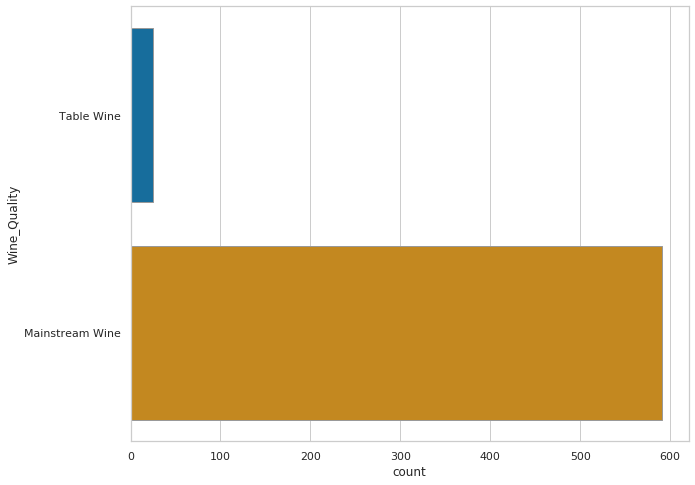

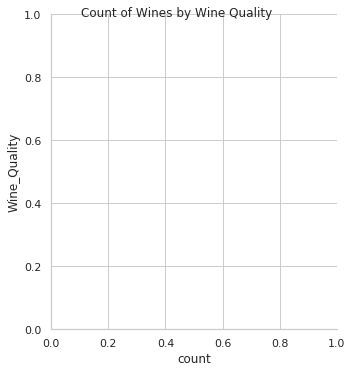

In [52]:
# Countplot: What is the distribution of scores by wine quality?

dim = (10, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(y = 'Wine_Quality', kind = 'count', palette='colorblind', edgecolor='.6', data = df_w_trim, ax = ax)
plt.suptitle('Count of Wines by Wine Quality')

Text(0.5, 0.98, 'Box Plot of Wine Spectator Score by Wine Quality')

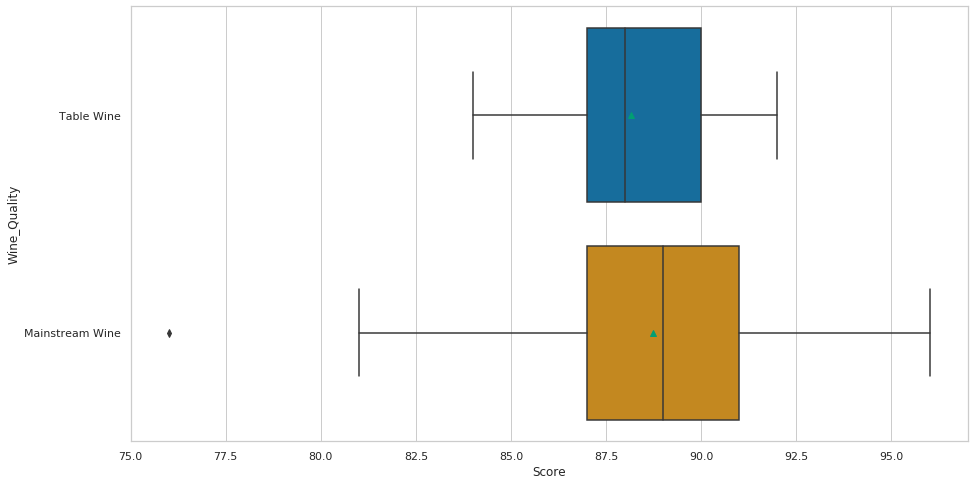

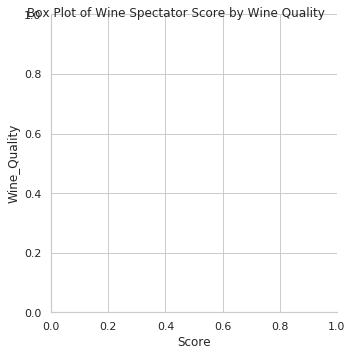

In [53]:
# Box Plot of Scores by Wine Quality

dim = (15, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(y = 'Wine_Quality', x = 'Score', data = df_w_trim, kind = 'box', ax = ax, showmeans = True)
plt.suptitle('Box Plot of Wine Spectator Score by Wine Quality')

Text(0.5, 0.98, 'Box Plot of Wine Price by Wine Quality')

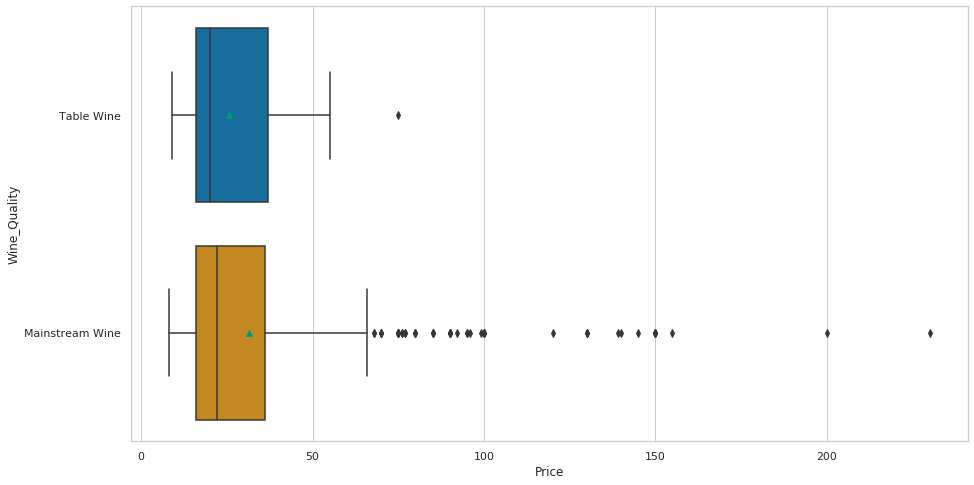

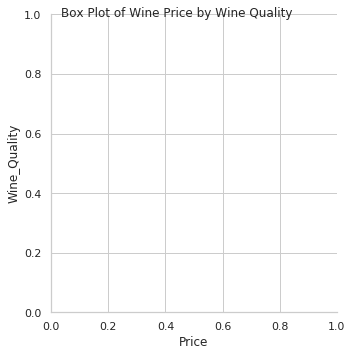

In [54]:
# Box Plot of Prices by Wine Quality

dim = (15, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(y = 'Wine_Quality', x = 'Price', data = df_w_trim, kind = 'box', ax = ax, showmeans = True)
plt.suptitle('Box Plot of Wine Price by Wine Quality')

### Hypothesis Test: Wine Score by Wine Quality
Determine whether or not the difference in means between wine qualities is statistically significant for Wine Spectator Score.  
#### Test Setup: Two-Sided T-Test on *Wine Spectator* Scores
Scores follow an apparent normal distribution; use Student's t distribution.  
  
  
H<sub>0</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub> = 0  
H<sub>1</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub> &#8800; 0  
  
significance level: 0.10

*Reject the null hypothesis when p-value < significance level*

In [55]:
# input significance level
sig = 0.1

In [56]:
# Create a loopable array of Wine Qualities
quals = df_w_trim.Wine_Quality.unique()

# Set up data frames to house two-sided t-test
ttest_cols = ['qual_1', 'qual_2', 's1', 's2', 'n1', 'n2', 'x1', 'x2', 'ttest_tstat', 'ttest_pvalue', 'reject_null']
df_t_s = pd.DataFrame(columns = ttest_cols)

# For each pair of wine qualities, populate the dataframe with statistics
for qual in quals:
    qual_1 = qual
    for qual in quals:
        qual_2 = qual
        # standard deviation of each wine quality
        s1 = df_w_trim[(df_w_trim.Wine_Quality == qual_1)].Score.std()
        s2 = df_w_trim[(df_w_trim.Wine_Quality == qual_2)].Score.std()
        # number of scores of each wine quality
        n1 = df_w_trim[(df_w_trim.Wine_Quality == qual_1)].Score.count()
        n2 = df_w_trim[(df_w_trim.Wine_Quality == qual_2)].Score.count()
        # sample mean by wine quality
        x1 = df_w_trim[(df_w_trim.Wine_Quality == qual_1)].Score.mean()
        x2 = df_w_trim[(df_w_trim.Wine_Quality == qual_2)].Score.mean()
        
        # Run SciPy stats t-test
        arr1 = df_w_trim[(df_w_trim.Wine_Quality == qual_1)].Score
        arr2 = df_w_trim[(df_w_trim.Wine_Quality == qual_2)].Score
        
        ttest = stats.ttest_ind(arr1, arr2)
        
        # reject the null hypothesis when the P-value is less than the significance level
        if ( ttest[1] < sig ):
            reject_null = True
        else:
            reject_null = False
        
        # put variables in array
        arr_temp = [qual_1, qual_2, s1, s2, n1, n2, x1, x2, ttest[0], ttest[1], reject_null]
        
        # convert array into series
        series_temp = pd.Series(arr_temp, index = df_t_s.columns)
        
        # append series to dataframe
        df_t_s = df_t_s.append(series_temp, ignore_index=True)

In [57]:
df_t_s

,qual_1,qual_2,s1,s2,n1,n2,x1,x2,ttest_tstat,ttest_pvalue,reject_null
0,Table Wine,Table Wine,2.672078,2.672078,25,25,88.160000,88.160000,0.000000,1.000000,False
1,Table Wine,Mainstream Wine,2.672078,2.675274,25,591,88.160000,88.729272,-1.042187,0.297735,False
2,Mainstream Wine,Table Wine,2.675274,2.672078,591,25,88.729272,88.160000,1.042187,0.297735,False
3,Mainstream Wine,Mainstream Wine,2.675274,2.675274,591,591,88.729272,88.729272,0.000000,1.000000,False


In [58]:
# Pivot table: p-values by wine quality

df_t_s.pivot(index = 'qual_1', columns = 'qual_2', values = 'ttest_pvalue')

qual_2,Mainstream Wine,Table Wine
qual_1,,
Mainstream Wine,1.000000,0.297735
Table Wine,0.297735,1.000000


In [59]:
# Pivot table: reject_null by wine quality

df_t_s.pivot(index = 'qual_1', columns = 'qual_2', values = 'reject_null')

qual_2,Mainstream Wine,Table Wine
qual_1,,
Mainstream Wine,False,False
Table Wine,False,False
